# Gene_Disease_overlap

## import libraries

In [1]:
#import libraries
suppressMessages({
    library(biomaRt)
    library(tidyr)
    library(dplyr)
    library(ggplot2)
    library(GeneOverlap)
    #library(overlapper)   
})

In [8]:
setwd("/home/nhk/Desktop/")

In [9]:
#Create a list for all modules with gene names
DEA <- list()

DEA$Black$Start <- read.table('Black.txt', header=TRUE, sep=',')
dim(DEA$Black$Start)
DEA$Black$Start$GeneName %>% duplicated() %>% table()

DEA$Blue$Start <- read.table('Blue.txt', header=TRUE, sep=',')
dim(DEA$Blue$Start)
DEA$Blue$Start$GeneName %>% duplicated() %>% table()

DEA$Brown$Start <- read.table('Brown.txt', header=TRUE, sep=',')
dim(DEA$Brown$Start)
DEA$Brown$Start$GeneName %>% duplicated() %>% table()

DEA$Green$Start <- read.table('Green.txt', header=TRUE, sep=',')
dim(DEA$Green$Start)
DEA$Green$Start$GeneName %>% duplicated() %>% table()

DEA$Magenta$Start <- read.table('Magenta.txt', header=TRUE, sep=',')
dim(DEA$Magenta$Start)
DEA$Magenta$Start$GeneName %>% duplicated() %>% table()

DEA$Pink$Start <- read.table('Pink.txt', header=TRUE, sep=',')
dim(DEA$Pink$Start)
DEA$Pink$Start$GeneName %>% duplicated() %>% table()

DEA$Red$Start <- read.table('Red.txt', header=TRUE, sep=',')
dim(DEA$Red$Start)
DEA$Red$Start$GeneName %>% duplicated() %>% table()

DEA$Turquoise$Start <- read.table('Turquoise.txt', header=TRUE, sep=',')
dim(DEA$Turquoise$Start)
DEA$Turquoise$Start$GeneName %>% duplicated() %>% table()

DEA$Yellow$Start <- read.table('Yellow.txt', header=TRUE, sep=',')
dim(DEA$Yellow$Start)
DEA$Yellow$Start$GeneName %>% duplicated() %>% table()

DEA$Grey$Start <- read.table('Grey.txt', header=TRUE, sep=',')
dim(DEA$Grey$Start)
DEA$Grey$Start$GeneName %>% duplicated() %>% table()

DEA$All$Start <- read.table('All.txt', header=TRUE, sep=',')
dim(DEA$All$Start)
DEA$All$Start$GeneName %>% duplicated() %>% table()


[1] 417   3

.
FALSE  TRUE 
  416     1 

[1] 1675    3

.
FALSE  TRUE 
 1674     1 

[1] 1528    3

.
FALSE 
 1528 

[1] 806   3

.
FALSE 
  806 

[1] 383   3

.
FALSE 
  383 

[1] 410   3

.
FALSE  TRUE 
  409     1 

[1] 753   3

.
FALSE  TRUE 
  752     1 

[1] 6874    3

.
FALSE  TRUE 
 6869     5 

[1] 1448    3

.
FALSE 
 1448 

[1] 1762    3

.
FALSE  TRUE 
 1760     2 

[1] 16056     3

.
FALSE  TRUE 
16039    17 

In [10]:
biomaRt::listEnsemblArchives() # from here I retrieve the correct name for 103 version

biomaRt::listMarts(host='feb2021.archive.ensembl.org')

Mart102Human <- biomaRt::useMart(host='feb2021.archive.ensembl.org', 
                     biomart='ENSEMBL_MART_ENSEMBL', 
                     dataset='hsapiens_gene_ensembl')

Mart102Mouse <- biomaRt::useMart(host='feb2021.archive.ensembl.org', 
                     biomart='ENSEMBL_MART_ENSEMBL', 
                     dataset='mmusculus_gene_ensembl')

name,date,url,version,current_release
<chr>,<chr>,<chr>,<chr>,<chr>
Ensembl GRCh37,Feb 2014,https://grch37.ensembl.org,GRCh37,
Ensembl 110,Jul 2023,https://jul2023.archive.ensembl.org,110,*
Ensembl 109,Feb 2023,https://feb2023.archive.ensembl.org,109,
Ensembl 108,Oct 2022,https://oct2022.archive.ensembl.org,108,
Ensembl 107,Jul 2022,https://jul2022.archive.ensembl.org,107,
Ensembl 106,Apr 2022,https://apr2022.archive.ensembl.org,106,
Ensembl 105,Dec 2021,https://dec2021.archive.ensembl.org,105,
Ensembl 104,May 2021,https://may2021.archive.ensembl.org,104,
Ensembl 103,Feb 2021,https://feb2021.archive.ensembl.org,103,


biomart,version
<chr>,<chr>
ENSEMBL_MART_ENSEMBL,Ensembl Genes 103
ENSEMBL_MART_MOUSE,Mouse strains 103
ENSEMBL_MART_SNP,Ensembl Variation 103
ENSEMBL_MART_FUNCGEN,Ensembl Regulation 103


In [11]:
MouseSymbols <- DEA$All$Start$GeneName %>% unique()
length(MouseSymbols)

[1] 16039

In [12]:
HumanHom <- biomaRt::getLDS(attributes='mgi_symbol', filters='mgi_symbol', values=MouseSymbols, 
                            mart=Mart102Mouse, attributesL=c('hgnc_symbol'), martL=Mart102Human, uniqueRows=T)

names(HumanHom) <- c('MouseSymbol', 'HGNCSymbol')

dim(HumanHom)

[1] 15580     2

In [13]:
duplicated.data.frame(HumanHom) %>% table()

.
FALSE 
15580 

In [14]:
DupMouse <- dplyr::filter(HumanHom, duplicated(MouseSymbol)) %>% dplyr::pull(MouseSymbol) %>% unique
length(DupMouse)

DupHGNC <- dplyr::filter(HumanHom, duplicated(HGNCSymbol)) %>% dplyr::pull(HGNCSymbol) %>% unique
length(DupHGNC)

HumanHom <- dplyr::filter(HumanHom, !MouseSymbol %in% DupMouse) %>% dplyr::filter(!HGNCSymbol %in% DupHGNC)
dim(HumanHom)

table(duplicated(HumanHom$MouseSymbol))

table(duplicated(HumanHom$HGNCSymbol))

[1] 326

[1] 360

[1] 14138     2


FALSE 
14138 


FALSE 
14138 

In [15]:
for(df in 1:length(DEA)){
  DEA[[df]]$Hom <- dplyr::inner_join(DEA[[df]]$Start, HumanHom, by=c('GeneName'='MouseSymbol'))
  print(dim(DEA[[df]]$Start))
  print(dim(DEA[[df]]$Hom))
}


DEA$Blue$Hom$GeneName %>% duplicated() %>% table()

[1] 417   3
[1] 385   4
[1] 1675    3
[1] 1546    4
[1] 1528    3
[1] 1452    4
[1] 806   3
[1] 750   4
[1] 383   3
[1] 337   4
[1] 410   3
[1] 361   4
[1] 753   3
[1] 678   4
[1] 6874    3
[1] 5850    4
[1] 1448    3
[1] 1298    4
[1] 1762    3
[1] 1493    4
[1] 16056     3
[1] 14150     4


.
FALSE  TRUE 
 1545     1 

In [16]:
length(DEA)

[1] 11

In [17]:
for(df in 1:length(DEA)){
  DEA[[df]]$Degs <- dplyr::filter(DEA[[df]]$Hom, padj < 1, abs(log2FoldChange) > 0)
  print(paste(names(DEA)[df], dim(DEA[[df]]$Degs)[1]))
}


[1] "Black 385"
[1] "Blue 1546"
[1] "Brown 1452"
[1] "Green 750"
[1] "Magenta 331"
[1] "Pink 361"
[1] "Red 676"
[1] "Turquoise 5850"
[1] "Yellow 1298"
[1] "Grey 1489"
[1] "All 14138"


In [18]:
DegList <- list()

DegList$Black<- DEA$Black$Degs$HGNCSymbol %>% unique()

DegList$Blue<- DEA$Blue$Degs$HGNCSymbol %>% unique()

DegList$Brown<- DEA$Brown$Degs$HGNCSymbol %>% unique()

DegList$Green<- DEA$Green$Degs$HGNCSymbol %>% unique()

DegList$Magenta<- DEA$Magenta$Degs$HGNCSymbol %>% unique()

DegList$Pink <- DEA$Pink$Degs$HGNCSymbol %>% unique()

DegList$Red <- DEA$Red$Degs$HGNCSymbol %>% unique()

DegList$Turquoise <- DEA$Turquoise$Degs$HGNCSymbol %>% unique()

DegList$Yellow <- DEA$Yellow$Degs$HGNCSymbol %>% unique()

DegList$Grey <- DEA$Grey$Degs$HGNCSymbol %>% unique()

DegList$All<- DEA$All$Degs$HGNCSymbol %>% unique()


In [19]:
DegList

$Black
  [1] "KIAA1109"  "ABCA8"     "ACTN1"     "ADGRF2"    "ADSS2"     "AFG3L2"   
  [7] "AGGF1"     "AGO3"      "AGO4"      "AGTPBP1"   "AKAP13"    "AKAP8"    
 [13] "ALG6"      "ANKLE2"    "ANO4"      "APOLD1"    "APPL1"     "ARF4"     
 [19] "ARHGAP18"  "ARID2"     "ARMC8"     "ARMCX3"    "ARMCX4"    "ARSK"     
 [25] "ASB13"     "ASCC3"     "ATAD5"     "ATF1"      "ATP6V1C1"  "AZI2"     
 [31] "B3GALT2"   "C6orf62"   "BCAP29"    "BCLAF3"    "BLM"       "BTBD10"   
 [37] "C2CD5"     "CACNA2D3"  "CAPZA2"    "CA2"       "CCDC47"    "CCN3"     
 [43] "CCNI"      "CDH10"     "CDH8"      "CDH9"      "CDK8"      "CDKL2"    
 [49] "CDKN2AIP"  "CELF4"     "CEP126"    "CEP135"    "CHD4"      "CHN1"     
 [55] "CLCN4"     "CNBP"      "CNOT1"     "CNOT7"     "CNTLN"     "CNTN3"    
 [61] "COCH"      "COPB1"     "CROT"      "CSDE1"     "CUL3"      "CUL5"     
 [67] "CYRIB"     "DCLRE1C"   "DHTKD1"    "DHX15"     "DHX36"     "DICER1"   
 [73] "DLD"       "DMTF1"     "DMXL1"     "DNAJB4"    "DOCK7"     "DPH6"     
 [79] "DR1"       "DROSHA"    "DSE"       "DSP"       "DSTN"      "DYNC1I1"  
 [85] "ECPAS"     "EHBP1"     "EHMT1"     "EIF1AX"    "EIF3A"     "EIF4A2"   
 [91] "EIF4ENIF1" "ELAPOR1"   "ELL2"      "EML6"      "ENOX1"     "EOGT"     
 [97] "ERG"       "EXOC5"     "EXOC6"     "F3"        "FAM120B"   "FAM193A"  
[103] "FBXO30"    "FBXO45"    "FERMT2"    "FGF12"     "FGF5"      "FIGNL1"   
[109] "FLNB"      "FOLH1"     "FUS"       "FUT8"      "GABRA2"    "GABRG1"   
[115] "GCC2"      "GLRA2"     "GOLGA4"    "GPC5"      "GPCPD1"    "GPR85"    
[121] "GRM8"      "HACE1"     "HAPLN1"    "HCCS"      "HDGFL3"    "HERC1"    
[127] "HERPUD2"   "HLTF"      "HNRNPA1"   "HNRNPA2B1" "HNRNPF"    "IARS2"    
[133] "ICE1"      "IGSF10"    "IHO1"      "IMPA1"     "INO80"     "INTS6"    
[139] "IVNS1ABP"  "JAK2"      "JAKMIP2"   "JAZF1"     "JRKL"      "KCNIP4"   
[145] "KDM3A"     "KDM4C"     "KIF21A"    "KLHL1"     "KLHL2"     "KMT2E"    
[151] "KRAS"      "KRR1"      "LAMB1"     "LETM1"     "LHX2"      "LHX9"     
[157] "LIN9"      "LNPK"      "LZTFL1"    "MAP4K5"    "MAPK10"    "MAPK6"    
[163] "MARCKS"    "MARK1"     "MBTD1"     "MCM3AP"    "MDH1"      "MDM2"     
[169] "MDN1"      "MED1"      "MED23"     "MEIS2"     "METAP1"    "METTL14"  
[175] "MGAT4C"    "MIS12"     "MKLN1"     "MKX"       "MLLT3"     "MOSPD1"   
[181] "MSH3"      "MSH6"      "MSMO1"     "MYNN"      "MYT1L"     "NAA25"    
[187] "NAA30"     "NAA50"     "NAB1"      "NAF1"      "NAMPT"     "NDFIP2"   
[193] "NDUFS1"    "NEB"       "NET1"      "NGLY1"     "NIN"       "NINL"     
[199] "NKTR"      "NPY5R"     "NUP54"     "NXT2"      "OLA1"      "OXCT1"    
[205] "P2RY12"    "PAIP1"     "PAPOLA"    "PCDH15"    "PCNX4"     "PDE7A"    
[211] "PDP1"      "PDZRN3"    "PFN2"      "PHACTR3"   "PHF3"      "PIAS2"    
[217] "PIK3C3"    "PIP4P2"    "PIWIL1"    "PLD5"      "PLEKHA3"   "PLOD2"    
[223] "PNPLA8"    "PPIP5K2"   "PPM1B"     "PPP1CC"    "PPP2R2B"   "PPP2R5C"  
[229] "PPP4R3A"   "PPP4R3B"   "PRKCB"     "PRKG2"     "PRPF4B"    "PRR16"    
[235] "PTK2"      "PTP4A1"    "PTPRK"     "PWWP2A"    "QTRT2"     "R3HDM1"   
[241] "RAB18"     "RAB1A"     "RAB21"     "RAB27B"    "RAB5A"     "RANBP2"   
[247] "RAP1B"     "RASL11B"   "RB1CC1"    "RBBP7"     "RBM26"     "RC3H2"    
[253] "RCN2"      "REV3L"     "RGS7"      "RND3"      "RNF103"    "RNF11"    
[259] "RNF115"    "RNF128"    "RNF180"    "RNF6"      "RNGTT"     "RNMT"     
[265] "RPS6KA3"   "RRAGA"     "RRBP1"     "RTN1"      "SACS"      "SALL1"    
[271] "SATB1"     "SCAF11"    "SCYL3"     "SEC63"     "SEPTIN11"  "SEPTIN7"  
[277] "SERAC1"    "SFPQ"      "SFR1"      "SGMS1"     "SLC25A4"   "SLC30A5"  
[283] "SLC30A9"   "SLC3A1"    "SLC40A1"   "SLC6A15"   "SMCHD1"    "SMIM10L1" 
[289] "SNAP23"    "SNX2"      "SNX5"      "SOCS6"     "SOGA3"     "SOX2"     
[295] "SPAST"     "SPOPL"     "SPRY2"     "SRR"       "SRRM1"     "SRSF1"    
[301] "ST8SIA3"   "STAG1"     "STAG2"     "STK26"     "STRN3"     "SYAP1"    
[307] "SYNCRIP"

In [21]:
Autism <- read.table('Autism.txt', header=TRUE, sep=',')

AD <- read.table('AD_alsgene_OMIM.txt', header=TRUE, sep=',')

ALS <- read.table('ALSoD.txt', header=TRUE, sep=',')

ATA <- read.table('Ataxia.txt', header=TRUE, sep=',')

FTD <- read.table('FTD.txt', header=TRUE, sep=',')

MR <- read.table('MR.txt', header=TRUE, sep=',')

PD <- read.table('PD_Gene4PD_OMIM.txt', header=TRUE, sep=',')

In [23]:
Universe <- DEA$All$Hom$HGNCSymbol %>% unique()
length(Universe)

[1] 14138

In [24]:
GeneVect <- list()

GeneVect$Autism <- unique(Autism$GeneName)[unique(Autism$GeneName) %in% Universe]

GeneVect$AD <- unique(AD$GeneName)[unique(AD$GeneName) %in% Universe]

GeneVect$ALS <- unique(ALS$GeneName)[unique(ALS$GeneName) %in% Universe]

GeneVect$ATA <- unique(ATA$GeneName)[unique(ATA$GeneName) %in% Universe]
 
GeneVect$FTD <- unique(FTD$GeneName)[unique(FTD$GeneName) %in% Universe] 

GeneVect$MR <- unique(MR$GeneName)[unique(MR$GeneName) %in% Universe] 

GeneVect$PD <- unique(PD$GeneName)[unique(PD$GeneName) %in% Universe]


In [25]:
GeneVect

$Autism
  [1] "ABAT"      "ABCA7"     "ACE"       "ACTN4"     "ADCY5"     "ADK"      
  [7] "ADORA3"    "AGAP1"     "AGBL4"     "AGMO"      "AGO3"      "AGTR2"    
 [13] "ADSS2"     "ANKS1B"    "APBA2"     "ARHGAP32"  "ARHGAP5"   "ARHGEF10" 
 [19] "ARID2"     "ARNT2"     "ASB14"     "ATP1A1"    "ATP1A3"    "ATP6V0A2" 
 [25] "BBS4"      "BCAS1"     "BIRC6"     "ADORA2A"   "ADRB2"     "AR"       
 [31] "BRCA2"     "BRD4"      "BICDL1"    "BRINP3"    "BTRC"      "C15orf62" 
 [37] "CACNA1B"   "CACNA1F"   "CACNA1G"   "CACNA1I"   "CACNA2D1"  "CADM1"    
 [43] "CADM2"     "CADPS2"    "CAMK2A"    "CAPN12"    "CARD11"    "CCDC88C"  
 [49] "CCDC91"    "CCSER1"    "CD276"     "CD38"      "CDH10"     "CDH11"    
 [55] "CDH8"      "CDH9"      "CECR2"     "CELF6"     "CEP290"    "CHD1"     
 [61] "CACNB1"    "CDON"      "CHRM3"     "CHRNB3"    "CLCN4"     "CLN8"     
 [67] "CMIP"      "CMPK2"     "CNTN3"     "CAMK4"     "CD99L2"    "CDH22"    
 [73] "CHM"       "CPT2"      "CPZ"       "CLIP2"     "CSMD1"     "CSNK1G1"  
 [79] "CTNNA3"    "CUX2"      "CX3CR1"    "DAGLA"     "DIPK2A"    "DIXDC1"   
 [85] "DLG1"      "DLGAP2"    "DLGAP3"    "DLL1"      "DLX6"      "DMWD"     
 [91] "DMXL2"     "DNAH10"    "DNAH17"    "DNAH3"     "DNER"      "DOCK1"    
 [97] "DOCK4"     "DPP3"      "DPP4"      "DPP6"      "DPYD"      "DPYSL3"   
[103] "DRD2"      "DST"       "DUSP15"    "DVL3"      "DYDC2"     "EGR3"     
[109] "DDC"       "DLX2"      "DRD1"      "EIF4E"     "EIF4G1"    "ELAVL2"   
[115] "EN2"       "EPC2"      "EPHB2"     "ERMN"      "ESR2"      "ESRRB"    
[121] "EXOC3"     "EXOC5"     "EXOC6"     "EXOC6B"    "EXT1"      "FABP5"    
[127] "FAM98C"    "FAN1"      "FAT1"      "FBXO11"    "FBXO40"    "FEZF2"    
[133] "FHIT"      "GABBR2"    "GABRA4"    "GALNT13"   "GALNT14"   "GDA"      
[139] "ELOVL2"    "ENPP1"     "ERG"       "FBXO33"    "FGF14"     "FXN"      
[145] "GAS2"      "GLIS1"     "GLO1"      "GLRA2"     "GNAS"      "GNB1L"    
[151] "GPC6"      "GPD2"      "GPR37"     "GPR85"     "GPX1"      "GRID2"    
[157] "GRID2IP"   "GRIK3"     "GRIK4"     "GRM5"      "GRM7"      "GTF2I"    
[163] "GUCY1A2"   "HDAC4"     "H2BC11"    "HOMER1"    "HTR1B"     "HTR3A"    
[169] "HYDIN"     "IL1R2"     "IL1RAPL1"  "IL1RAPL2"  "IMMP2L"    "INPP1"    
[175] "IQGAP3"    "ITPR1"     "ITSN1"     "JMJD1C"    "KANK1"     "KATNAL1"  
[181] "KCNC1"     "KCND2"     "KCND3"     "IGF1"      "KAT6B"     "KCNK7"    
[187] "KCNMA1"    "KCTD13"    "KDM1B"     "KDM4B"     "KHDRBS2"   "KIF13B"   
[193] "KIF5C"     "KLF16"     "KRR1"      "LAMA1"     "LIN7B"     "LRBA"     
[199] "LRFN2"     "LRFN5"     "LRP2"      "LRRC1"     "HS3ST5"    "HSD11B1"  
[205] "LAS1L"     "LDLR"      "LRRC4"     "LZTS2"     "MAOA"      "MAOB"     
[211] "MAPK3"     "MARK1"     "MBD1"      "MBD3"      "MBD4"      "MBD6"     
[217] "MCM4"      "MCM6"      "MCPH1"     "MDGA2"     "MED12L"    "MEGF10"   
[223] "MEGF11"    "MEMO1"     "MIB1"      "MNT"       "MSANTD2"   "MTF1"     
[229] "MTHFR"     "METTL26"   "MRTFB"     "MSX2"      "MYLK"      "MYO16"    
[235] "MYO1E"     "MYO5C"     "NCKAP5"    "NEGR1"     "NEO1"      "NFIA"     
[241] "NFIB"      "NIPA1"     "NIPA2"     "NR1D1"     "NR2F1"     "NRCAM"    
[247] "NRP2"      "NCAPH2"    "NDUFA5"    "NPAS2"     "NTNG1"     "NTRK1"    
[253] "NSMCE3"    "NTRK3"     "NUP133"    "NXPH1"     "ODF3L2"    "OFD1"     
[259] "OTX1"      "OXT"       "PAFAH1B2"  "PAPOLG"    "PBX1"      "PATJ"     
[265] "PCDH10"    "PCDH15"    "PCDH9"     "PCDHA1"    "PCDHA10"   "PCDHA13"  
[271] "PCDHA2"    "PCDHA3"    "NXF1"      "PCDHAC1"   "PCM1"      "PDE1C"    
[277] "PDK2"      "PER1"      "PEX7"      "PLAUR"     "PLCD4"     "PLN"      
[283] "PLXNA3"    "PNPLA7"    "POLA2"     "POMT1"     "PPFIA1"    "PPM1D"    
[289] "PPP2R1B"   "PRKAR1B"   "PRKCA"     "PRKDC"     "PRPF39"    "PRUNE2"   
[295] "PSD3"      "PTBP2"     "PEBP4"     "PJA1"      "POLR3A"    "PTGS2"    
[301] "PTPRB"     "PTPRC"     "PTPRT"     "PXDN"      "RAB11FIP5" "RAB39B"   
[307] "RAD21L1

In [26]:
OvObj <- newGOM(DegList, GeneVect, genome.size=length(Universe))
print(OvObj)

A GeneOverlapMatrix object:
###### Intersection ######
          Autism AD ALS ATA FTD  MR  PD
Black         49  0   3   3   1   9   4
Blue         174  7   7  13   1  22  26
Brown        191  7  10  10   0  33  21
Green         33  6   2   3   1   5   6
Magenta       12  2   1   0   0   0   5
Pink          13  4   4   1   0   3   2
Red           21  3   2   0   0   3   7
Turquoise    166 15  10  17   1  23  44
Yellow        71  3   3  10   1   8  17
Grey          78  4   7  13   0   8  14
All          808 51  49  70   5 114 146
###### P-value ######
                Autism         AD        ALS        ATA       FTD           MR
Black     9.965131e-08 1.00000000 0.14758275 0.29614586 0.1286420 3.868801e-03
Blue      1.541729e-19 0.32114405 0.28495629 0.03828684 0.4393802 5.571473e-03
Brown     4.900523e-30 0.26647583 0.02516361 0.17790158 1.0000000 2.162468e-08
Green     9.572516e-01 0.05181142 0.74140191 0.72536933 0.2385850 7.296857e-01
Magenta   9.692102e-01 0.33614353 0.68740071 1.0

In [27]:
getMatrix(OvObj, name='intersection')

,Autism,AD,ALS,ATA,FTD,MR,PD
Black,49,0,3,3,1,9,4
Blue,174,7,7,13,1,22,26
Brown,191,7,10,10,0,33,21
Green,33,6,2,3,1,5,6
Magenta,12,2,1,0,0,0,5
Pink,13,4,4,1,0,3,2
Red,21,3,2,0,0,3,7
Turquoise,166,15,10,17,1,23,44
Yellow,71,3,3,10,1,8,17
Grey,78,4,7,13,0,8,14


In [28]:
getMatrix(OvObj, name='pval')

,Autism,AD,ALS,ATA,FTD,MR,PD
Black,9.965131e-08,1.00000000,0.14758275,0.29614586,0.1286420,3.868801e-03,0.563353124
Blue,1.541729e-19,0.32114405,0.28495629,0.03828684,0.4393802,5.571473e-03,0.008219582
Brown,4.900523e-30,0.26647583,0.02516361,0.17790158,1.0000000,2.162468e-08,0.070523269
Green,9.572516e-01,0.05181142,0.74140191,0.72536933,0.2385850,7.296857e-01,0.793194149
Magenta,9.692102e-01,0.33614353,0.68740071,1.00000000,1.0000000,1.000000e+00,0.257302756
Pink,9.748011e-01,0.04047142,0.03567970,0.83634495,1.0000000,5.582135e-01,0.889794573
Red,9.995487e-01,0.44232580,0.68602652,1.00000000,1.0000000,9.141888e-01,0.550192727
Turquoise,1.000000e+00,0.97193734,0.99946124,0.99911763,0.9307605,9.999996e-01,0.998152381
Yellow,6.736260e-01,0.85922259,0.84005470,0.10543732,0.3821911,8.327971e-01,0.183780616
Grey,8.108108e-01,0.79857397,0.25292607,0.02922312,1.0000000,9.226153e-01,0.683092169


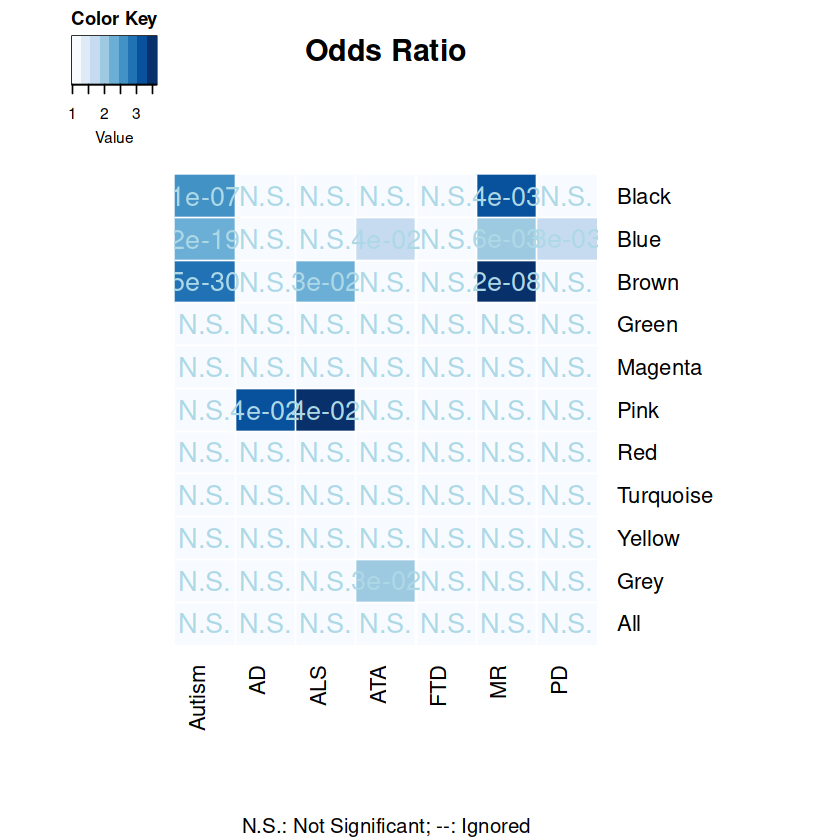

In [29]:
drawHeatmap(OvObj, 
            cutoff=0.05, 
            note.col='lightblue', 
            grid.col = 'Blues')

## DotPlot: data preparation

In [30]:
OR <- data.frame(getMatrix(OvObj, name='odds.ratio')) 
OR$DEGs <- row.names(OR) 
OR <- gather(OR, 'KBase', 'OR', -DEGs)

PVAL <- data.frame(getMatrix(OvObj, name='pval')) 
PVAL$DEGs <- row.names(PVAL) 
PVAL <- gather(PVAL, 'KBase', 'PVal', -DEGs)

NUM <- data.frame(getMatrix(OvObj, name='intersection')) 
NUM$DEGs <- row.names(NUM) 
NUM <- gather(NUM, 'KBase', 'Numbers', -DEGs)


if(! identical(OR$DEGs, PVAL$DEGs)){
  stop('Inconsistecy')
}
if(! identical(OR$DEGs, NUM$DEGs)){
  stop('Inconsistecy')
}
if(! identical(OR$KBase, NUM$KBase)){
  stop('Inconsistecy')
}
if(! identical(OR$KBase, NUM$KBase)){
  stop('Inconsistecy')
}


Res <- mutate(OR, Pval=PVAL$PVal) %>% mutate(Numbers=NUM$Numbers)
Res

DEGs,KBase,OR,Pval,Numbers
<chr>,<chr>,<dbl>,<dbl>,<int>
Black,Autism,2.5040448,9.965131e-08,49
Blue,Autism,2.3936867,1.541729e-19,174
Brown,Autism,2.9624107,4.900523e-30,191
Green,Autism,0.7490903,9.572516e-01,33
Magenta,Autism,0.6148696,9.692102e-01,12
Pink,Autism,0.6118083,9.748011e-01,13
Red,Autism,0.5172086,9.995487e-01,21
Turquoise,Autism,0.3479641,1.000000e+00,166
Yellow,Autism,0.9502515,6.736260e-01,71


## DotPlot: visualization 

#### Selection of  significant overlaps having an OR > 1 and at least 5 overlapping genes. Dots are shown for PVals < 0.1 (set in the plot). Max value in the plot must be set according to minimum PVal to avoid dots not to be shown.

In [31]:
cols <- viridis::cividis(100)[1:80]

ResSel <- dplyr::filter(Res, OR>0) %>% dplyr::filter(Numbers > 0) 

min(ResSel$Pval)

[1] 4.900523e-30

In [32]:
min(ResSel$OR)

[1] 0.3479641

In [ ]:
write.csv(ResSel, "ResSel_DotPlot_visualization.csv")

In [33]:
ResSel_new = read.csv("ResSel_DotPlot_visualization_PFT.csv")

ResSel_new

X,DEGs,KBase,OR,Pval,Numbers,Percentage
<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
11,All,Autism,Inf,4.933818e-01,808,5.03772056
21,All,AD,Inf,9.583611e-01,50,0.31174013
32,All,ALS,Inf,9.591781e-01,49,0.30550533
41,All,ATA,Inf,9.421553e-01,70,0.43643619
47,All,FTD,Inf,9.957627e-01,5,0.03117401
57,All,MR,Inf,9.073830e-01,114,0.71076750
68,All,PD,Inf,8.828373e-01,146,0.91028119
1,Black,Autism,2.5040448,9.965131e-08,49,11.77884615
22,Black,ALS,2.3462301,1.475828e-01,3,0.72115385


In [66]:
pdf("Dot_plot_With_filtering_percentage_PFT.pdf", wi=9, h=7)

library("scales")
ggplot(ResSel_new, aes(DEGs, KBase, label=round(Percentage,1))) + 
  geom_point(aes(size=-log10(Pval), col=OR)) + 
  geom_text() + 
  scale_size_continuous(range=c(5, 20), limits=c(1, round(-log10(min(ResSel$Pval)) + 0.5))) +

  scale_color_gradient2(low = "white",
  mid = "orange",
  high =("red"),
  midpoint = 1.5,
  space = "Lab",
  na.value = "grey50",
  guide = "colourbar",
  aesthetics = "colour", limits=c(0, 4)) + 

xlab('') + ylab('') +
  theme_bw() +
  theme(axis.line = element_blank(), axis.title = element_blank(), 
        axis.text.x = element_text(angle = 45, hjust = 1),
       axis.text=element_text(size = 13, colour = "black")) 


dev.off()

Warning message:
“Removed 54 rows containing missing values (geom_point).”


png 
  2